# Libraries

In [42]:
import pandas as pd
from pandas_profiling import ProfileReport
import import_ipynb
from EDAClass import Eda
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## File: Transactions

In [2]:
transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions', header=1)

In [3]:
transactions.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62                  41245.0  
1     2091.47         388.92                  41701.0  
2     1793.43         248.82                  36361.0  
3     1198.46         381.10                  36145.0  
4     1765.30         709.48                  42226.0

In [95]:
df = transactions.groupby(transactions['transaction_date']).count().iloc[:,0]
df

transaction_date
2017-01-01    55
2017-01-02    46
2017-01-03    56
2017-01-04    59
2017-01-05    64
              ..
2017-12-26    55
2017-12-27    52
2017-12-28    57
2017-12-29    53
2017-12-30    47
Name: transaction_id, Length: 364, dtype: int64

### Missing Values

In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [66]:
transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

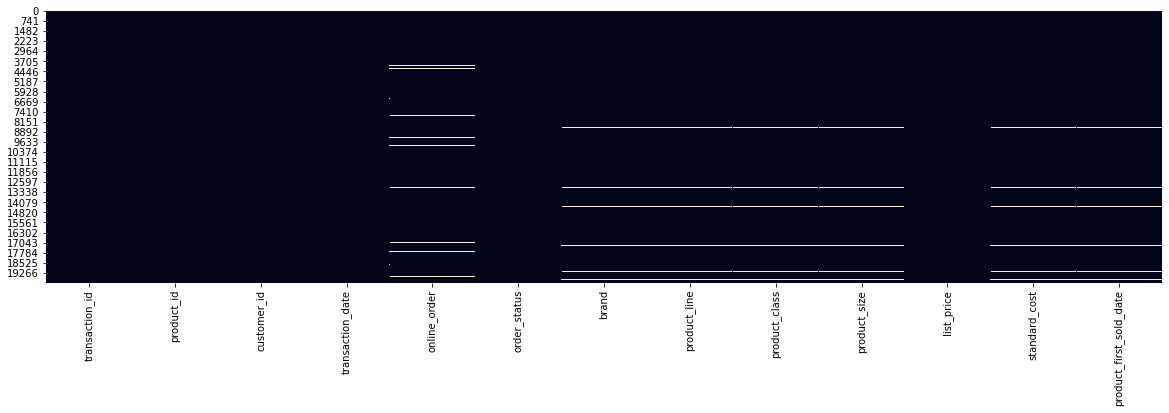

In [72]:
plt.figure(figsize=(20,5))
sns.heatmap(transactions.isnull(), cbar=False)
plt.show()

In [60]:
transactions['online_order'] = transactions['online_order'].astype('object')

### Duplicated Rows

In [5]:
transactions[transactions.duplicated(keep=False)]

Empty DataFrame
Columns: [transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost, product_first_sold_date]
Index: []

### Unique Values

In [11]:
print('Unique transaction_id:', transactions.transaction_id.unique().shape)
print('Unique product_id:', transactions.product_id.unique().shape)
print('Unique customer_id:', transactions.customer_id.unique().shape)
print('Unique transaction_date:', transactions.transaction_date.unique().shape)

Unique transaction_id: (20000,)
Unique product_id: (101,)
Unique customer_id: (3494,)
Unique transaction_date: (364,)


In [12]:
print('Unique product_id:\n', transactions.product_id.unique())

Unique product_id:
 [  2   3  37  88  78  25  22  15  67  12   5  61  35  16  79  33  54  27
  82  89  64  19  72  91   1  99   0  92  14  44  76  46  55  66  81  86
  32  77  96   6  47  94  93  60  28   4  38  56  58  50  80  87  84  21
  31  62  17  73  45  49  95  18  70  26  39  36  98  75  42  20  24  53
  65  29  11  10   7  41   9  69  90  97 100  74  71  34  57  23  51  59
  63  40   8  13  30  48  68  83  43  52  85]


In [35]:
print('Unique brand:', transactions.brand.unique())
print('Unique product_line:', transactions.product_line.unique())
print('Unique product_class:', transactions.product_class.unique())
print('Unique product_size:', transactions.product_size.unique())
print('Unique online order:', transactions.online_order.unique())

Unique brand: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
Unique product_line: ['Standard' 'Road' 'Mountain' 'Touring' nan]
Unique product_class: ['medium' 'low' 'high' nan]
Unique product_size: ['medium' 'large' 'small' nan]
Unique online order: [0.0 1.0 nan]


### Description

In [14]:
transactions.describe()

transaction_id   product_id   customer_id  online_order    list_price  \
count    20000.000000  20000.00000  20000.000000  19640.000000  20000.000000   
mean     10000.500000     45.36465   1738.246050      0.500458   1107.829449   
std       5773.647028     30.75359   1011.951046      0.500013    582.825242   
min          1.000000      0.00000      1.000000      0.000000     12.010000   
25%       5000.750000     18.00000    857.750000      0.000000    575.270000   
50%      10000.500000     44.00000   1736.000000      1.000000   1163.890000   
75%      15000.250000     72.00000   2613.000000      1.000000   1635.300000   
max      20000.000000    100.00000   5034.000000      1.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19803.000000             19803.000000  
mean      556.046951             38199.776549  
std       405.955660              2875.201110  
min         7.210000             33259.000000  
25%       215.140000             35667.000000  
50%       507.580000             38216.000000  
75%       795.100000             40672.000000  
max      1759.850000             42710.000000

In [15]:
transactions.describe(include=['O'])

order_status  brand product_line product_class product_size
count         20000  19803        19803         19803        19803
unique            2      6            4             3            3
top        Approved  Solex     Standard        medium       medium
freq          19821   4253        14176         13826        12990

### Histograms

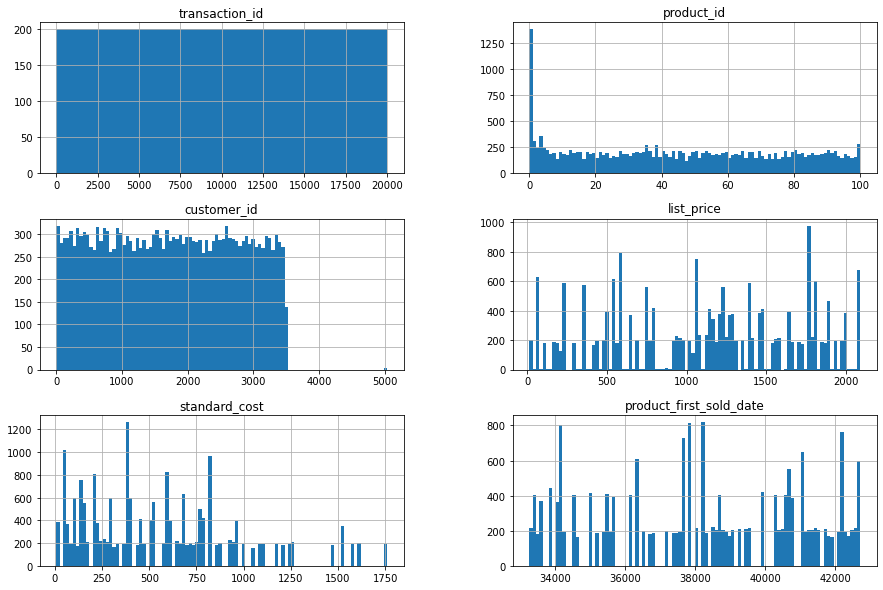

In [36]:
transactions.hist(figsize=(15,10), bins=100)
plt.show()

### Bar chart for categorical variables

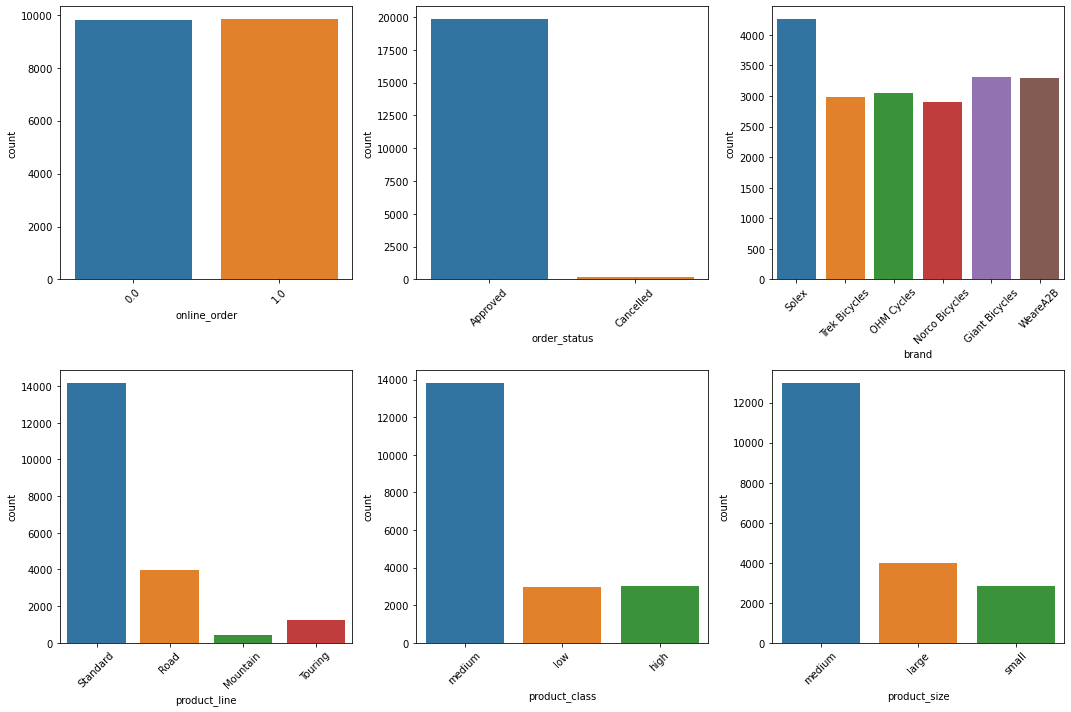

In [61]:
df_cat = transactions.select_dtypes(include='object')
fig, axes = plt.subplots(round((len(df_cat.columns)-1)/3),3, figsize=(15,10))
for i, ax in enumerate(fig.axes):
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(),rotation=45)
    sns.countplot(data = df_cat, x = df_cat.columns[i], ax=ax)
plt.tight_layout()
plt.show()

### Trend Chart

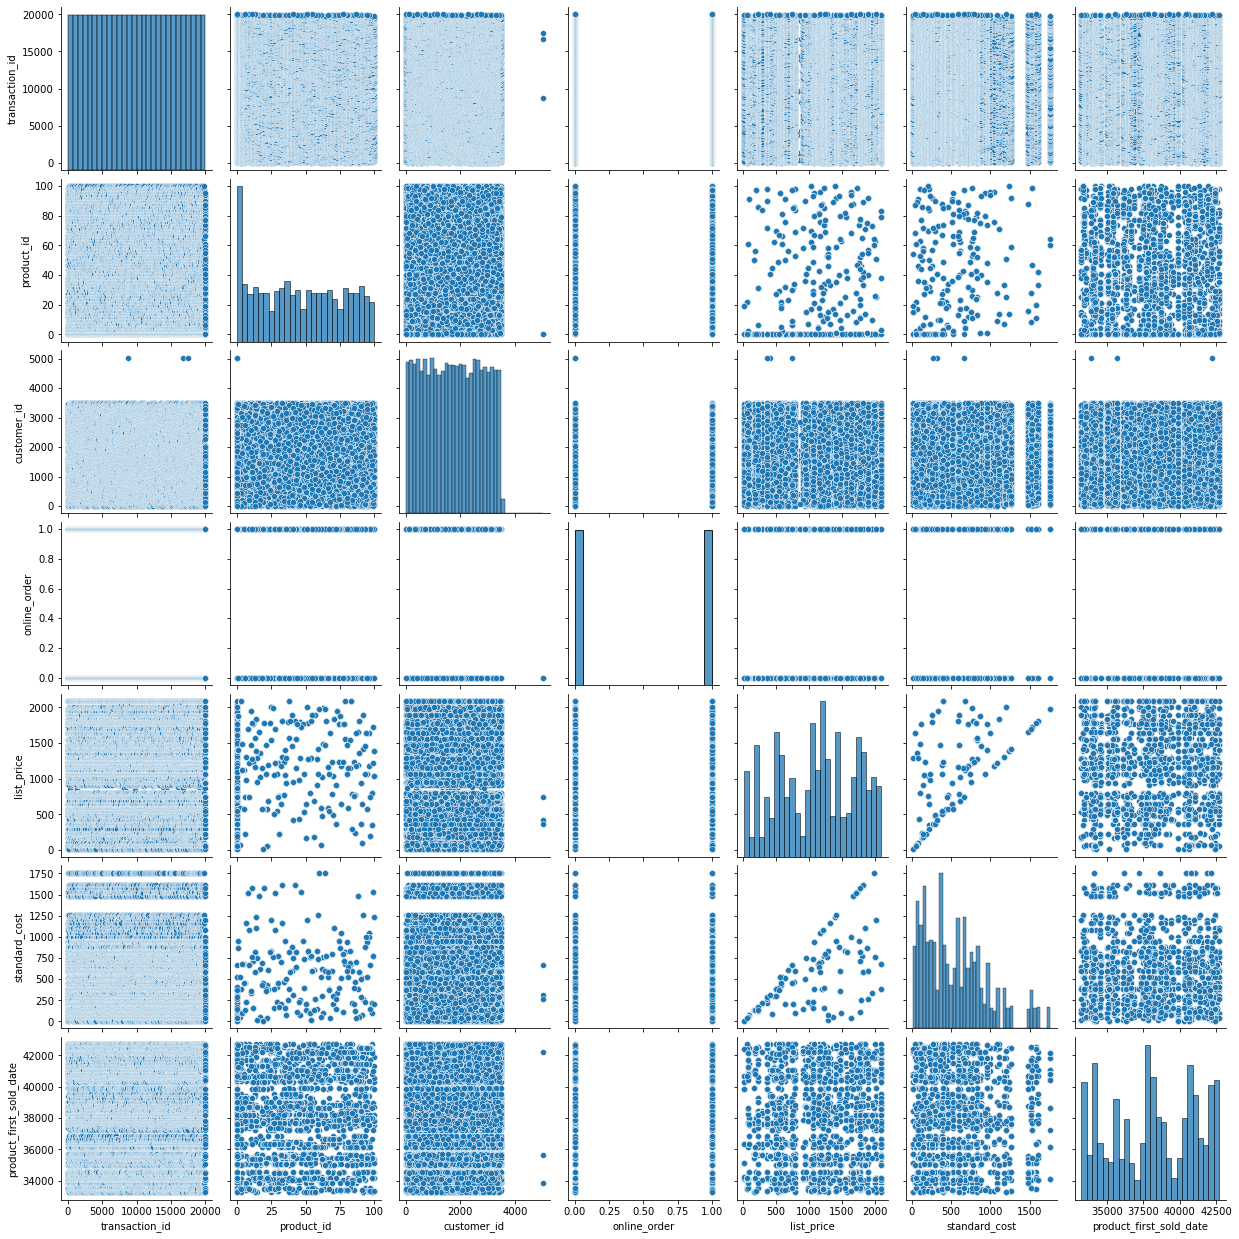

In [41]:
sns.pairplot(transactions)

### Pandas Report

In [16]:
ProfileReport(transactions)